<a href="https://colab.research.google.com/github/And2300/Trash/blob/main/plots_C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install --user fonttools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 930 kB 7.6 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [119]:
datContent = np.array([np.array(i.strip().split()) for i in open("solverInfo.dat").readlines()],dtype=object)
#hay que eliminar solver information
# hay que juntar # y Time en #Time

In [120]:
df = pd.DataFrame(datContent)
df.columns=df.loc[0]
df = df.iloc[1:].reset_index(drop=True)

In [121]:
df.head()

,#Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,Uz_initial,Uz_final,Uz_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000e+00,2.224620e-02,2,1.000000e+00,2.224620e-02,2,4.112100e-05,8.973510e-07,2,false,GAMG,1.000000e+00,5.253330e-02,18,true
1,2,smoothSolver,5.609730e-01,4.025180e-02,2,5.444070e-01,3.690850e-02,2,8.167630e-01,7.515240e-02,1,false,GAMG,3.037070e-02,1.551180e-03,2,true
2,3,smoothSolver,2.402980e-01,1.834810e-02,2,2.328470e-01,1.680020e-02,2,5.218560e-01,1.505210e-02,2,false,GAMG,2.522630e-02,2.054050e-03,4,true
3,4,smoothSolver,6.569380e-02,4.639060e-03,2,5.539010e-02,3.997870e-03,2,2.857740e-01,1.083490e-02,2,false,GAMG,3.494970e-02,2.159800e-03,6,true
4,5,smoothSolver,1.264100e-01,7.847760e-03,2,1.314610e-01,7.806570e-03,2,2.214150e-01,6.345170e-03,2,false,GAMG,1.875760e-01,1.311330e-02,2,true


In [46]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (15,8), #(6.8,4.8)  (12.8,4.8)
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,#7
                 "xtick.minor.size"     : 3.5,#3.5
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 'xtick.labelsize'      : 12, #taamaño X
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

In [47]:
df.columns

Index(['#Time', 'U_solver', 'Ux_initial', 'Ux_final', 'Ux_iters', 'Uy_initial',
       'Uy_final', 'Uy_iters', 'Uz_initial', 'Uz_final', 'Uz_iters',
       'U_converged', 'p_solver', 'p_initial', 'p_final', 'p_iters',
       'p_converged'],
      dtype='object', name=0)

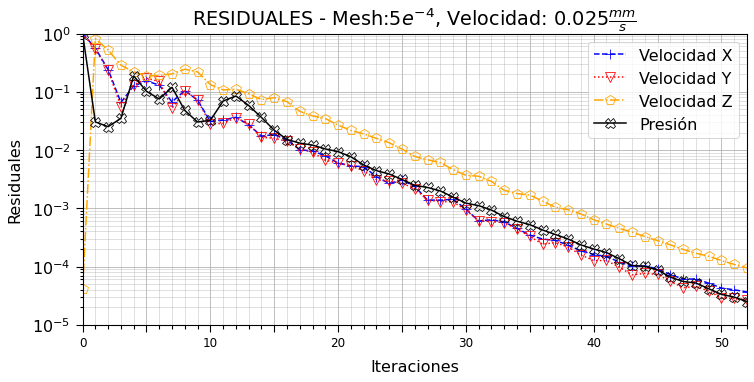

In [122]:
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
major_ticks = np.arange(0, 100, 5)    
minor_ticks = np.arange(0, 100, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='major')
ax.grid(which='minor', alpha=0.5)
#ax.set_aspect('equal')

xticks = ax.get_xticks().tolist()
for i in range(1, len(xticks), 2):
    xticks[i] = ''
ax.set_xticklabels(xticks)

yticks = ax.get_yticks().tolist()
for i in range(1, len(yticks), 2):
    yticks[i] = ''
ax.set_yticklabels(yticks)

#plots
ax.plot(df['Ux_initial'].astype(float), label="Velocidad X", color='blue', marker='+',linestyle='dashed')
ax.plot(df['Uy_initial'].astype(float), label="Velocidad Y", color='red', marker='v',linestyle='dotted')
ax.plot(df['Uz_initial'].astype(float), label="Velocidad Z", color='orange', marker='p',linestyle='dashdot')
ax.plot(df['p_initial'].astype(float), label="Presión", color='k', marker='X',linestyle='solid')

ax.set_title(r'RESIDUALES - Mesh:$5e^{-4}$, Velocidad: $0.025 \frac{mm}{s}$')
ax.set_xlabel(r'Iteraciones')
ax.set_ylabel(r'Residuales')

ax.legend(loc='upper right')
ax.set_yscale('log')

fig.savefig("chao_res_5e4_0025.png", dpi=500,bbox_inches='tight')

plt.show()

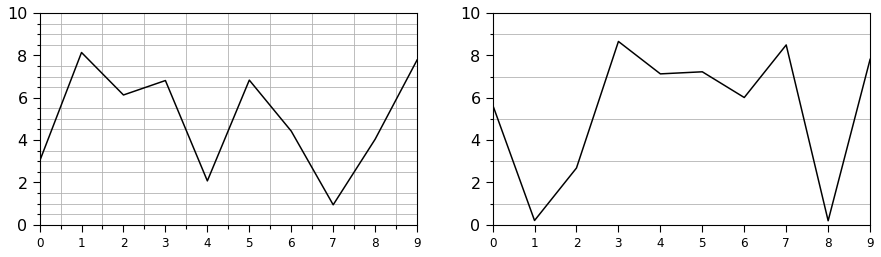

In [61]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Two example plots
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

spacing = 0.5 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax1.plot(9 * np.random.rand(10))
# Set minor tick locations.
ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)
# Set grid to use minor tick locations. 
ax1.grid(which = 'minor')

spacing = 1
minorLocator = MultipleLocator(spacing)
ax2.plot(9 * np.random.rand(10))
# Set minor tick locations.
ax2.yaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
# Set grid to use minor tick locations. 
ax2.grid(which = 'minor')

plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


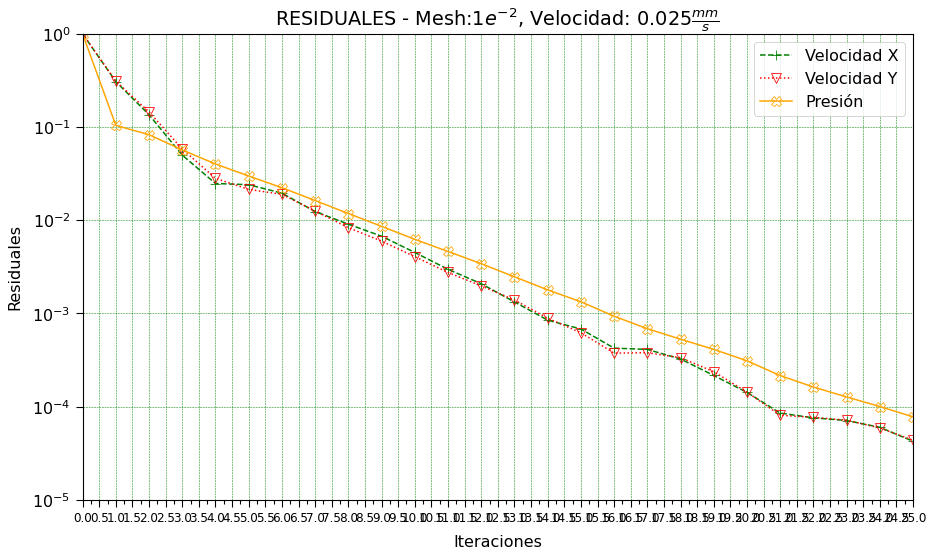

In [66]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 26, 0.5))
ax.set_yticks(np.arange(10e0, 10e-5, 5e-1))

plt.plot(df['Ux_initial'].astype(float), label="Velocidad X", color='green', marker='+',linestyle='dashed')
plt.plot(df['Uy_initial'].astype(float), label="Velocidad Y", color='red', marker='v',linestyle='dotted')
#plt.plot(df['Uz_initial'].astype(float), label="Velocidad Z", color='blue', marker='p',linestyle='dashdot')
plt.plot(df['p_initial'].astype(float), label="Presión", color='orange', marker='X',linestyle='solid')
#plt.xlim(0, 13)
#plt.ylim(2.5, None)
plt.title(r'RESIDUALES - Mesh:$1e^{-2}$, Velocidad: $0.025 \frac{mm}{s}$')
plt.xlabel(r'Iteraciones')
plt.ylabel(r'Residuales')
plt.legend(loc='upper right')
#plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
#plt.text(1, 33, r'$v_{experimental}= 3.739 \pm 0.393 \frac{mm}{s}$', fontsize=20)
#plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
#plt.annotate('[b]', xy=(0,38),fontsize=30)
plt.yscale('log')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
#plt.savefig("pump2_0.075.png", dpi=1000)
plt.show()